#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales
###Alumno Jose de Jesus Peña Rodriguez 
###Matricula A01794940

## **Adtividad Semanas 03 y 04**

###**Pre-procesamiento, Matrices Documeto-Término (DTM) y TF-IDF.**

En esta actividad deberás utilizar los datos de tres archivos que se encuentran en Canvas:

*   **amazon_cells_labelled.txt** Contiene 1000 registros de comentarios de usuarios que adquirieron un producto a través de la plataforma de Amazon.

*   **imdb_labelled.txt** Contiene 1000 registros de comentarios que dejaron usuarios sobre palículas y series en la plataforma de IMBD.

*   **yelp_labelled.txt** Contiene 1000 comentarios de usuarios sobre servicios de comida dejados en l aplataforma de Yelp.

Igualmente son los archivos que encuentras en el Machine Learning Repository de la UCI, llamado "Sentiment Labelled Sentences": https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#



In [216]:
import pandas as pd  
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import string

In [217]:
nltk.download('punkt')    # es un tokenizador que ayuda a dividr el texto en enunciados mediante un modelo no-supervisado.
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idiomas.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/josedejesuspena/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josedejesuspena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [174]:
# Veamos la lista de stopwords que se incluyen de manera predeterminada la suite de librerías de NLTK:

mis_stopwords=[]
print(len(stopwords.words('english')))
print(stopwords.words('english'))
mis_stopwords=stopwords.words('english')


179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [175]:
# Consideremos la siguiente lista de palabras asociada a negaciones en inglés:

negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

##**Pregunta - 1:**




Excluye todas las palabras de la lista "negwords" de la lista predeterminada de "stopwords", para definir un nuevo conjunto llamado **mystopwords**, con el cual trabajaremos en esta Actividad:


In [176]:
################################################################################
# AGREGA AQUÍ TU LÍNEA O LÍNEAS DE CÓDIGO - Pregunta 1:

mystopwords = [i for i in mis_stopwords if i not in negwords]


# FIN PARA AGREGAR TU LÍNEA O LÍNEAS DE CÓDIGO.
################################################################################

print(len(mystopwords))
print(mystopwords)

139
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's

###**Cargamos los datos de Amazon**

In [1]:
# Puedes modificar en dado caso la ruta de los archivos:

dfa = pd.read_csv('amazon_cells_labelled.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv('imdb_labelled.txt', delimiter='\t', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv('yelp_labelled.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')


print('Total de registros de Amazon:',dfa.shape)
print('Total de registros de IMBD:',dfi.shape)
print('Total de registros de Yelp:',dfy.shape)

NameError: name 'pd' is not defined

La salida anterior esperada es la siguiente:

Total de registros de Amazon: (1000, 2)

Total de registros de IMBD: (748, 2)

Total de registros de Yelp: (1000, 2)

In [178]:
dfa.head()     # Cada uno de estos data frame está formado de dos columnas, 
               # uno con los comentarios (review) y otro con la etiqueta (label).
               # En particular aquí mostramos en el Amazon:

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Sin embargo, observa que los registros de IMBD no son los 1000 que se indican en la documentación de estos datos, sino 748. 

En realidad no son datos perdidos, sino que varios de ellos fueron capturados errónamente como uno solo. En ocasiones, la gran cantidad de caracteres especiales existentes en la actualidad generan este tipo de problemas.

Por ejemplo, observa la salida siguiente y cómo el registro de índice 19 tiene una gran cantidad de registros conjuntados como uno solo. Es decir, se conjuntó indebidamente información de las dos columnas del data frame.



In [179]:
dfi.values.tolist()[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  \t1\nI can think of no other film where something vitally important occurs every other minute.  \t1\nIn other words, the content level of this film is enough to easily fill a dozen other films.  \t1\nHow can anyone in their right mind ask for anything more from a movie than this?  \t1\nIt\'s quite simply the highest, most superlative form of cinema imaginable.  \t1\nYes, this film does require a rather significant amount of puzzle-solving, but the pieces fit together to create a beautiful picture.  \t1\nThis short film certainly pulls no punches.  \t0\nGraphics is far from the best part of the game.  \t0\nThis is

Además, se observa que cada comentario (review) debe estar separado de su evaluación (label) por un tabulador "\t" y después separado del siguiente registro por un salto de línea "\n".

Usaremos esta información para separar de manera adecuada estos registros del conjunto de IMBD.

##**Pregunta - 2:**

En este ejercicio deberás corregir este problema que tienen los comentarios de IMBD, del cual se registran 748 comentarios, cuando deben ser 1000.

Como cada data frame tiene 2 columnas, el comentario y la evaluación, en algunas ocasiones el valor numérico de la evaluación se toma como parte del comentario y esto empieza a generar dichos errores. 

El problema se puede intentar resolver de varias formas, sin embargo puedes al menos seguir los siguientes pasos para obtener de nuevo los 1000 comentarios en IMBD:


1.   Conjuntar en un solo string cada comentario (review) con su evaluación (label), separados por un tabulador "\t". Toma en cuenta que ambos deben ser del tipo de dato string.

2.   Separa cada uno de estos string con el método split() y con respecto al salto de línea "\n". Esto te debe llevar a que cada registro es ahora una lista con un solo string que contiene el comenario (review), seguido del tabulador y de la etiqueta (label). O bien, tienes una lista de varios string, donde cada string es un review, seguido por el tabulador y su label.

3.   Ahora separa cada cada uno de los string del paso anterior con respecto al tabulador "\t", para ya tener separados ahora sí, todos los comentarios (review) de su evaluación (label). 

4.   Agrega cada uno de estos nuevos comentarios (review) y etiquetas (label) a la nueva lista que llamamos "newdfi".

El número de elementos de la nueva lista "newdfi" debe de ser de 1000, donde cada elemento está formado a su vez por una lista de dos elementos, donde el primero es un string del comentario (review) y el segundo es un número entero de la etiqueta (label).

Básicamente la idea fue conjuntar de nuevo la información de ambas columnas, para separarlas de nuevo de la manera adecuada.






In [180]:
tmpdfi = dfi.values.tolist()     # lista con los 748 registros.
newdfi=[]     # lista de salida que deberá tener los 1000 registros ya debidamente separados.

################################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 2:

separador="\t"


for registro in tmpdfi:
    string_registro = separador.join(map(str, registro))  
    lista_registro = string_registro.split("\n")
    for i in range(len(lista_registro)):
        if lista_registro[i]:
          sep_int_string= [int(x) if x.isdigit() else x for x in lista_registro[i].split("\t")]
          newdfi.append(sep_int_string)


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
################################################################################


print('La nueva lista tiene 1000 elementos:', (len(newdfi)==1000))

La nueva lista tiene 1000 elementos: True


In [181]:
# Verificando los registros donde habíamos detectado uno de los problemas:
newdfi[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  ',
  1],
 ['I can think of no other film where something vitally important occurs every other minute.  ',
  1]]

En particular la salida anterior debe ser algo como lo siguiente:

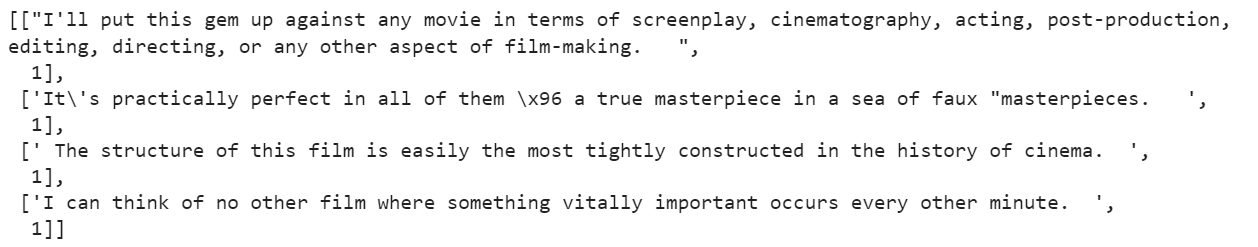

Transformemos en data frame la lista recién generada de los comentarios (review) y evaluaciones (label) del conjunto de evaluaciones de películas IMBD:

In [182]:
dfii = pd.DataFrame(newdfi, columns=['review','label'])

dfii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [183]:
# y concatenamos los tres conjuntos para tener finalmente los 3000 registros:

df = pd.concat([dfa, dfii, dfy], ignore_index=True)   # Tienes que usar el "ignore_index", de lo contrario reincia cada 
                                                      # vez de 0 a 999 los índices.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


La salida esperada anterior debe ser semajante a los siguiente:

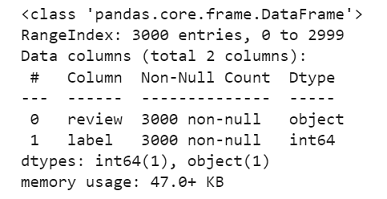

In [184]:
df['label'].value_counts()   # Recordemos que tenemos un 50% de comentarios positivos y de negativos.

label
0    1500
1    1500
Name: count, dtype: int64

In [185]:
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


##**Pregunta - 3:**

Sabemos que existen comentarios muy diversos. Por ejemplo, observa los registros 1125 y 1788, cuyas salidas deben de ser 10/10. De los 3000, dos de los comentarios fueron simplemente de esta forma.

Cuando apliques el proceso de limpieza en la pregunta 4, como solo consideraremos caracteres alfabéticos, estos dos registros quedarán vacíos.

En particular ¿cómo tratarías estos dos comentarios? ¿Simplemente los descartarías? ¿Los incluirías haciendo algún ajuste particular? ¿Alguna otra decisión que consideres adecuada para estos dos casos? 

**Incluye a continuación tus comentarios sobre la decisión que tomarías para el tratamiento en particular de estos dos registros, 1125 y 1788. Justifica tu respuesta.**

In [186]:
df.iloc[1788,:]   # verificando tu salida

review    10/10  
label           1
Name: 1788, dtype: object

In [187]:
df.iloc[1125,0]="Excelente"

In [188]:
df.iloc[1788,0]="Excelente"

In [189]:
df.iloc[1125]

review    Excelente
label             1
Name: 1125, dtype: object

########################################################
##### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 3:**


Al analizar los datos, hemos observado que en los registros 1125 y 1788, en lugar de escribir una crítica, los usuarios han optado por asignar una calificación numérica, específicamente la máxima. Por consiguiente, en estos casos particulares, lo mejor sería actualizar dichos registros para que, en lugar de la nota, se incluya una opinión. Para una puntuación de 10/10, el adjetivo adecuado sería "EXCELENTE"



##### **FIN PARA AGREGAR TUS COMENTARIOS**
#########################################################

In [190]:
 # Separamos la información: 
 #     La "X" serán los datos de entrada, los comentarios.
 #     La "Y" será la variable de salida, la evaluación.
 # Ambos, X y Y son "Series" 

X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s

assert X.shape == (3000,)           # verificando que tenemos la dimensiones esperadas.
assert Y.shape == (3000,)

##**Pregunta - 4:**

**En esta etapa deberás llevar a cabo el procesamiento, limpieza y tokenización de los comentarios de texto.**

Deberás de incluir los procesos que se indicarán a continuación, aunque no necesariament deben ser en este orden. De hecho deberás estar revisando la salida de algunos de los registros para que determines cual consideras podría ser el mejor orden de estos pasos.

La incluiremos en una función llamada "clean_tok()" ya que es la tokenización y limpieza básica de cada uno de los 3000 comentarios. La entrada de esta función son cada uno de estos 3000 strings/comentarios.

Lo que nos regresa "clean_tok()" es una lista de tokens/strings ya simplificados de cada comentario de entrada.

Los pasos a incluir son los siguientes (repito, tú deberás determinar el orden de ellos, aquí se incluyen en orden alfabético):

*   **Caracteres alfabéticos:** Solo considerar caracteres alfabéticos. Por lo tanto, deberán ser eliminados signos de puntuación, caracteres especiales y números.

*   **Longitud mayor a 1:** Se deben considerar solamente tokens de longitud mayor a 1.

*   **Minúsculas:** Simplificar todo a minúsculas.

*   **Stopwords:** Eliminar las stopwords.

*   **Tokenización:** Cada comentario queda tokenizado por palabras, o cadena de caracteres alfabéticos.

Por ejemplo, si el primer comentario de X fuera el string 'All you need is love!', lo que nos regresaría clean_tok() sería la lista de strings ['need', 'love'] que llamaremos "tokens".

In [191]:
def clean_tok(doc):
  ##############################################################################
  # AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 4:

  # Reemplazo de caracteres no alfabéticos con espacios en blanco
    doc = [re.sub(r'[^a-zA-Z\s]', ' ', review) for review in doc]
    
    # Conversión a minúsculas
    doc = [review.lower() for review in doc]
    
    # Eliminación de stopwords
    doc = [[word for word in review.split() if word not in mystopwords] for review in doc]

    #Delimitar la longitud de tokens validos
    long_token = 1
    tokens = [[word for word in sublist if len(word) > long_token] for sublist in doc]


    return tokens
  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

In [192]:
# Aplicamos el proceso de limpieza y tokenización:

limpieza_token =clean_tok(X)
Xcleantok=limpieza_token    

Veamos los primeros comentarios.

En particular observa si "minutes" y "major" están como dos tokens separados en el cuarto comentario. De nos ser así, si aparecen juntos como un solo token, debes revisar tu proceso de limpieza anterior, porque esto significa que pueden existir otros muchos casos que nos llevan a esta salida no deseada. Trata de determinar el origen de este problema (y solo en caso de que te haya aparecido como un solo token "minutesmajor", en el cuarto comentario).


In [193]:
for x in Xcleantok[0:5]:
  print(x)

['no', 'way', 'plug', 'us', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tied', 'charger', 'conversations', 'lasting', 'minutes', 'major', 'problems']
['mic', 'great']


##**Pregunta - 5:**

Esta pregunta es abierta y podrás incluir todos aquellos procesos de limpieza adicionales que desees.

Por ejemplo, puedes decidir aplicar algunos procesos (regex) para simplificar caracteres que aparecen repetidos más de dos veces, o bien simplificar algunas conjugaciones de verbos regulares para no incluir terminaciones en "s", "ed" o "ing". Puedes también decidir aplicar alguna de las técnicas de stemming o de lemmatization, etc.

NOTA: Deberás aplicar al menos dos procesos de limpieza o normalización adicionales en esta función que llamamos simplemente clean_doc().

La entrada son cada una de las listas con los comentarios tokenizados de Xcleantok y la salida es una lista de tokens simplficados/normalizados con el nombre de "tokens". En dado caso, algunos de los comentarios tokenizados pudieran no surgir cambio alguno bajo esta función.

Recuerda que el objetivo de esta función "clean_doc()" es tener datos más limpios para el proceso de entrenamiento con los algoritmos de aprendizaje automático que se realizarán en las últimas preguntas.

Puedes inspeccionar de manera aleatoria algunos de los 3000 registros para determinar qué procesos de limpieza adicionales incluir.

In [194]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 5:

def clean_doc(doc):
    
    
    # Inicializar el stemmer
    stemmer = PorterStemmer()
    
    # Aplicar stemming a cada palabra en cada sublista de doc y mantener las sublistas
    stemmed_doc = [[stemmer.stem(word) for word in sublist] for sublist in doc]

    #Eliminar las palabras repitas, si existen 
    stemmed_sin_repeticiones=[]

    for i in range(len(stemmed_doc)):
      sublista_aux=[]
      sublista_temp=stemmed_doc[i]
      for sub_i in range(len(sublista_temp)):
        string_temp=sublista_temp[sub_i]
        if string_temp not in sublista_aux:
            sublista_aux.append(string_temp)
      stemmed_sin_repeticiones.append(sublista_aux)
    

    return stemmed_sin_repeticiones

  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

In [195]:
# Aplicamos el proceso de limpieza/normalización adicionales:
Xclean = clean_doc(Xcleantok)

In [196]:
Xclean[0:5]         # Veamos los primero registros para ver cómo va quedando el resultado.

[['no', 'way', 'plug', 'us', 'unless', 'go', 'convert'],
 ['good', 'case', 'excel', 'valu'],
 ['great', 'jawbon'],
 ['tie', 'charger', 'convers', 'last', 'minut', 'major', 'problem'],
 ['mic', 'great']]

In [197]:
len(Xclean)

3000

##**Pregunta - 6:**

En esta pregunta deberás generar la nube de palabras de cada clase: la de los comentarios positivos y la de los comentarios negativos.

En la primera parte de esta pregunta y a partir del conjunto de comentarios obtenido hasta ahora, Xclean, deberás obtener el string de comentarios positivos llamada "pt" y el de comentarios negativos "nt".

En la parte 2 deberás mostrar las dos nubes de palabras: la nube de palabras de los comentarios positivos y la nube de palabras de los comentarios negativos.

En la parte 3 de este ejercicio deberás incluir tus comentarios de lo que observas de ambas nubes de palabras.

Igualmente deberás incluir los paquetes o librerías necesarios.

In [198]:
df_stem= pd.DataFrame({"Tokens": Xclean, "Rates": Y})
df_stem

,Tokens,Rates
0,"[no, way, plug, us, unless, go, convert]",0
1,"[good, case, excel, valu]",1
2,"[great, jawbon]",1
3,"[tie, charger, convers, last, minut, major, pr...",0
4,"[mic, great]",1
...,...,...
2995,"[think, food, flavor, textur, lack]",0
2996,"[appetit, instantli, gone]",0
2997,"[overal, not, impress, would, go, back]",0
2998,"[whole, experi, underwhelm, think, go, ninja, ...",0


In [199]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 1:

df_stem= pd.DataFrame({"Tokens": Xclean, "Rates": Y})
df_stem

#Creamos una mascara para cada valor positivo y negativo
filtro_positivos = (df_stem["Rates"]==1)
filtro_negativos = (df_stem["Rates"]==0)


#Asignamos el filtro a un nuevo df

#Postivos
df_reviews_positivos = df_stem.loc[filtro_positivos]
#Negativos
df_reviews_negativos = df_stem.loc[filtro_negativos]

#Se crea una lista apartir de solo los comentarios positivos 
comentarios_positivos=df_reviews_positivos["Tokens"]
flat_list_positivos = [word for sublist in comentarios_positivos for word in sublist]

#Se crea una lista apartir de solo los comentarios negativos
comentarios_negativos=df_reviews_negativos["Tokens"]
flat_list_negativos = [word for sublist in comentarios_negativos for word in sublist]


#Se agrupa la lista en un texto y esto se imprime para ver la nube de las opiniones positivas
pt = ' '.join(flat_list_positivos)
#Se agrupa la lista en un texto y esto se imprime para ver la nube de las opiniones negativas
nt = ' '.join(flat_list_negativos)

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

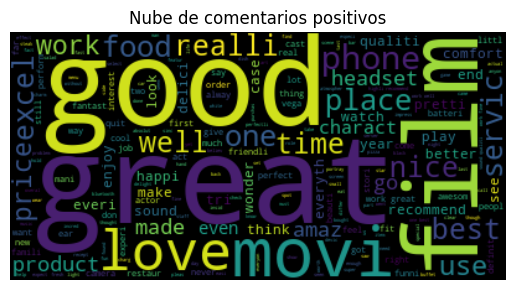

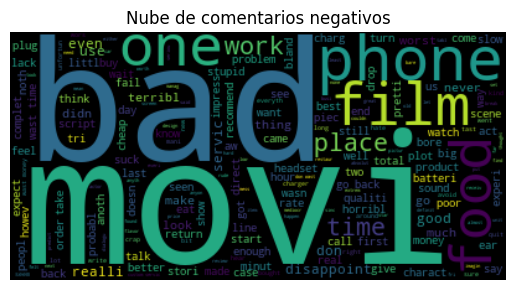

In [200]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 2:

# Crea una instancia de WordCloud
nube_positivos = WordCloud().generate(pt)
#Se imprime la nube de palabras
plt.imshow(nube_positivos, interpolation='bilinear')
plt.title("Nube de comentarios positivos")
plt.axis("off")
plt.show()

# Crea una instancia de WordCloud
nube_negativos = WordCloud().generate(nt)
#Se imprime la nube de palabras
plt.imshow(nube_negativos, interpolation='bilinear')
plt.title("Nube de comentarios negativos")
plt.axis("off")
plt.show()



# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

######################################################################
###### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 6 - parte 3:**

**Comentarios positivos de acuerdo a la nube de palabras:**
Los usuarios destacan aspectos como la calidad y la comida. Las palabras "great", "good", "excellent", "best", "love" y "nice" reflejan la satisfacción general de las opiniones.

**Comentarios negativos:**
Los usuarios expresaron preocupaciones sobre ciertos aspectos, como la calidad de la comida y la experiencia en el cine. Las palabras "bad", "worst", "terrible", "never", quality y "disappoint" señalan áreas donde se puede mejorar segun el sector donde estemos hablando.

###### **FIN PARA AGREGAR TUS COMENTARIOS.**
######################################################################

###**Train-Validation-Test**

Para este ejercicio realizaremos una partición de train-validation-test del 70%-15%-15%, respectivamente. 

Obviamente la distribución de esta partición puede ser otro de los hiperparámetros a determinar, pero para fines de este ejercicio consideraremos dichos valores.

In [201]:
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1) 
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


###Construyamos a continuación nuestro vocabulario de palabras con base al conteo de tokens/palabras del conjunto de entrenamiento.

In [202]:
from collections import Counter

In [203]:
midiccionario = Counter()    

for k in range(len(x_train)):
  midiccionario.update(x_train[k])


print('Longitud del diccionario:', len(midiccionario))  
print('\n(word,frequency):') 
print(midiccionario.most_common(10)) 

Longitud del diccionario: 3168

(word,frequency):
[('not', 205), ('good', 157), ('great', 133), ('movi', 130), ('phone', 123), ('film', 121), ('work', 109), ('time', 100), ('like', 94), ('one', 93)]


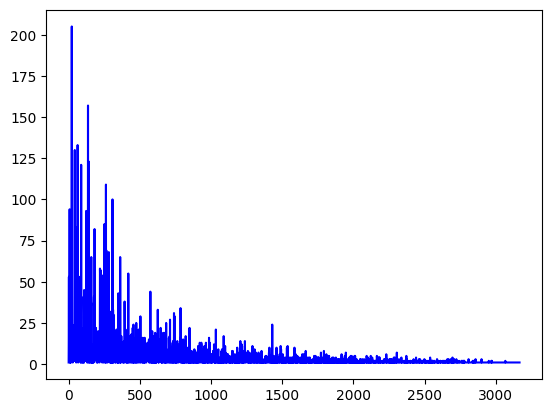

In [204]:
# Veamos la gráfica de palabras nuestro diccionario con base a la frecuencia de las palabras/tokens:

plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

###Descartemos palabras cuya frecuencia en el conjunto de entrenamiento es muy pequeña:

##**Pregunta - 7:**

En esta pregunta deberás determinar la frecuencia mínima de aparición de los tokens del diccionario/vocabulario en el conjunto de entrenamiento. Es usual que al menos se filtren los tokens de frecuencia 1, ya que usualmente no dan mayor información.

Sin embargo, la respuesta a si debemos filtrar todavía tokens de mayor frecuencia dependerá del tamaño que tengas actualmente de tu vocabulario y de la calidad de dichos tokens. Una manera de determinar dicha calidad de los tokens es con el resultado de los modelos de aprendizaje (regresión logística, random-forest, etc.) que aplicarás en los ejercicios de la última parte de esta Actividad.

Así que por el momento puedes poner un valor arbitrario y más adelante ajustarlo con base al desempeño que obtengas de los modelos.

Sin embargo, debes cuidar que la frecuencia de los tokens no la consideres demasiado grande, que empieces a generar una gran cantidad de comentarios vacíos en tu conjunto de entrenamiento.

Llamaremos "min_freq" a la frecuencia mínima de aparición de un token para considerarlo dentro del vocabulario/diccionario. Debe ser un número entero.

Llamaremos "midicc" al nuevo diccionario que generes con tokens de frecuencia natural (es decir, de conteo) mayor o igual a "min_freq".

In [205]:
#Antes de poder pasar a la parte de reduccion, tenemos que crear una lista unica con todos los comentarios
#tomados por Xclean 

tokens_Xcean= [word for sublist in Xclean for word in sublist]

In [206]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 7:

min_freq = 5
#Creamos nuestro nuevo diccionario reducido en tokens 

temp_midicc={}
midicc={}

for i in tokens_Xcean:
    if i in temp_midicc:
        temp_midicc[i]+=1

    else:
        temp_midicc[i]=1

#Realizamos el filtrado de acuerdo a la numero de incidencias, en este caso 
for palabra, incidencia in temp_midicc.items():
    if incidencia>min_freq:
        midicc[palabra]=incidencia
        

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:20])     # veamos algunos elementos del diccionario.

Nueva longitud del nuevo vocabulario: 639
[('no', 76), ('way', 47), ('plug', 16), ('us', 25), ('unless', 7), ('go', 98), ('good', 220), ('case', 39), ('excel', 55), ('valu', 11), ('great', 202), ('charger', 19), ('last', 25), ('minut', 34), ('problem', 32), ('get', 76), ('line', 23), ('right', 33), ('decent', 9), ('volum', 12)]


###Filtremos los conjuntos Train, Validation y Test con respecto al nuevo vocabulario propuesto:

In [207]:
train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

In [208]:
# Podemos ver algunos de los comentarios de entrenamiento, antes y después 
# de incluir la condición de la frecuencia mínima de ocurrencia de un token:

for k in range(3):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])

Antes: ['co', 'star', 'don', 'fare', 'much', 'better', 'peopl', 'like', 'morgan', 'freeman', 'jonah', 'hill', 'ed', 'helm', 'wast']
Después: ['star', 'don', 'much', 'better', 'peopl', 'like', 'wast']
Antes: ['tonight', 'elk', 'filet', 'special', 'suck']
Después: ['special', 'suck']
Antes: ['paid', 'bill', 'not', 'tip', 'felt', 'server', 'terribl', 'job']
Después: ['not', 'felt', 'server', 'terribl', 'job']


###Obtengamos las matrices de conteo document-term-matrix como matrices dispersas (sparse matrices ). Para ello requerimos que cada comentario esté como un solo string.

In [209]:
train_x_docs = []
for k in range(len(train_x)):
  train_x_docs.append(' '.join(train_x[k]))

val_x_docs = []
for k in range(len(val_x)):
  val_x_docs.append(' '.join(val_x[k]))

test_x_docs = []
for k in range(len(test_x)):
  test_x_docs.append(' '.join(test_x[k]))



# Verifica que los primeros comentarios de Train están cada uno como un solo string:
for k in range(3):
  print(train_x_docs[k])

star don much better peopl like wast
special suck
not felt server terribl job


###Ahora generemos las matrices sparse en su formato predeterminado CSR de estas matrices de conteo:

In [210]:
mivocab = list(midicc.keys())     # Obtenemos nuestro vocabulario de tokens/palabras.

#mivocab.sort()    # Usualmente se ordenan alfabéticamente, pero para visualizar algunos de los valores 
                   # no cero de las matrices, por el momento no lo haremos.



# Generamos las matrices dispersas requeridas con base al conteo de los tokens:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(vocabulary=mivocab)
train_x_count = countvectorizer.fit_transform(train_x_docs)     
val_x_count = countvectorizer.transform(val_x_docs) 
test_x_count = countvectorizer.transform(test_x_docs)

count_tokens = countvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = train_x_count.toarray(),  columns = count_tokens)  
print(df_countvect.iloc[0:3,6:18])   # veamos las frecuencias de los primeros comentarios.

   good  case  excel  valu  great  charger  last  minut  problem  get  line  \
0     0     0      0     0      0        0     0      0        0    0     0   
1     0     0      0     0      0        0     0      0        0    0     0   
2     0     0      0     0      0        0     0      0        0    0     0   

   right  
0      0  
1      0  
2      0  


In [211]:
p_sparse = 1 - train_x_count.count_nonzero() / (train_x_count.shape[0] * train_x_count.shape[1])    # Sparsity : Porcentaje de valores de 0.
print('Porcentaje de valores cero de la matriz sparse de entrenamiento: %.1f%%' % (100*p_sparse))

Porcentaje de valores cero de la matriz sparse de entrenamiento: 99.3%


##**Pregunta - 8:**

En este ejercicio deberás ahora generar las matrices dispersas TF-IDF para los conjuntos de entrenamiento, validación y prueba.

Deberás usar el vocabulario "mivocab" para generar dichas matrices.

Dichas matrices las llamaremos "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

Deberás agregar además las librerías o módulos necesarios. 

Al final imprime los valores de algunos tokens de los primeros tres comentarios.

In [212]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 8:
from sklearn.model_selection import train_test_split

# Crear un objeto TfidfVectorizer
vectorizador = TfidfVectorizer()

train_x_tfidf = vectorizador.fit_transform(train_x_docs)     
val_x_tfidf = vectorizador.transform(val_x_docs) 
test_x_tfidf = vectorizador.transform(test_x_docs)

count_tokens_tfidf = countvectorizer.get_feature_names_out()
print("Tokens y sus frecuencias TF-IDF para los primeros 3 comentarios:")
df_countvect_tfidf = pd.DataFrame(data = train_x_count.toarray(),  columns = count_tokens_tfidf)  
print(df_countvect_tfidf.iloc[0:3, 6:18])  # Imprime los primeros 3 comentarios y las columnas de términos TF-IDF

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

Tokens y sus frecuencias TF-IDF para los primeros 3 comentarios:
   good  case  excel  valu  great  charger  last  minut  problem  get  line  \
0     0     0      0     0      0        0     0      0        0    0     0   
1     0     0      0     0      0        0     0      0        0    0     0   
2     0     0      0     0      0        0     0      0        0    0     0   

   right  
0      0  
1      0  
2      0  


##**Pregunta - 9:**

###A continuación, usando Sklearn, deberás aplicar los modelos de regresión logística (lo llamaremos modeloLRcount), ranfom-forest para clasificación (lo llamaremos modeloRFcount) y naive-bayes en su opción MultinomialNB (lo llamaremos modeloNBcount). 

###Deberás de utilizar las matrices de conteo "train_x_count", "val_x_count" y "test_x_count".

###Con el mejor modelo obtenido, se usará el conjunto de prueba (test) para obtener el desempeño (Accuracy) final y su matriz de confusión.

###Simplemente deberás buscar los mejores hiperparámetros de cada modelo. 

###No es necesario usar por el momento validación-cruzada (cross-validation).

###Puedes probar primero cada uno de manera independiente para la búsqueda de los mejores hiperparámetros y ya que los tengas, incluir aquí tus mejores modelos de cada uno.

Resultados usando el modelo de Regresion

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Crear una instancia del modelo Logistic Regression
modelo_logistico = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_logistico.fit(train_x_count, y_train)

val_x_count = countvectorizer.transform(val_x_docs)
test_x_count = countvectorizer.transform(test_x_docs)

# Hacer predicciones en el conjunto de validación
predicciones_val = modelo_logistico.predict(val_x_count)

# Hacer predicciones en el conjunto de prueba
predicciones_test = modelo_logistico.predict(test_x_count)

reporte_val = classification_report(y_val, predicciones_val)
print("Informe de clasificación Datos (Modelo de Regresion)- Set de Validacion:")
print(reporte_val)

reporte_test = classification_report(y_test, predicciones_test)
print("Informe de clasificación Datos (Modelo de Regresion)- Set de Prueba")
print(reporte_test)

Informe de clasificación Datos (Modelo de Regresion)- Set de Validacion:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       216
           1       0.85      0.84      0.85       234

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450

Informe de clasificación Datos (Modelo de Regresion)- Set de Prueba
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       216
           1       0.83      0.79      0.81       234

    accuracy                           0.80       450
   macro avg       0.80      0.81      0.80       450
weighted avg       0.81      0.80      0.80       450



In [214]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del modelo Random Forest
modelo_rf = RandomForestClassifier(class_weight="balanced")  # Puedes ajustar class_weight según sea necesario

# Entrenar el modelo con los datos de entrenamiento
modelo_rf.fit(train_x_count, y_train)

# Transformar los datos de validación y prueba utilizando CountVectorizer 
val_x_count = countvectorizer.transform(val_x_docs)
test_x_count = countvectorizer.transform(test_x_docs)

# Hacer predicciones en el conjunto de validación
predicciones_val_rf = modelo_rf.predict(val_x_count)

# Hacer predicciones en el conjunto de prueba
predicciones_test_rf = modelo_rf.predict(test_x_count)

# Generar informe de clasificación para el conjunto de validación
reporte_val_rf = classification_report(y_val, predicciones_val_rf)
print("Informe de clasificación - Random Forest (Set de Validación):")
print(reporte_val_rf)

# Generar informe de clasificación para el conjunto de prueba
reporte_test_rf = classification_report(y_test, predicciones_test_rf)
print("Informe de clasificación - Random Forest (Set de Prueba):")
print(reporte_test_rf)


Informe de clasificación - Random Forest (Set de Validación):
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       216
           1       0.86      0.85      0.85       234

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450

Informe de clasificación - Random Forest (Set de Prueba):
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       216
           1       0.80      0.75      0.78       234

    accuracy                           0.78       450
   macro avg       0.78      0.78      0.78       450
weighted avg       0.78      0.78      0.78       450



In [215]:
from sklearn.naive_bayes import MultinomialNB

# Crear una instancia del modelo Naive Bayes
modelo_nb = MultinomialNB()

# Entrenar el modelo con los datos de entrenamiento
modelo_nb.fit(train_x_count, y_train)

# Hacer predicciones en el conjunto de validación
predicciones_val_nb = modelo_nb.predict(val_x_count)

# Hacer predicciones en el conjunto de prueba
predicciones_test_nb = modelo_nb.predict(test_x_count)

# Generar informe de clasificación para el conjunto de validación
reporte_val_nb = classification_report(y_val, predicciones_val_nb)
print("Informe de clasificación - Naive Bayes (Set de Validación):")
print(reporte_val_nb)

# Generar informe de clasificación para el conjunto de prueba
reporte_test_nb = classification_report(y_test, predicciones_test_nb)
print("Informe de clasificación - Naive Bayes (Set de Prueba):")
print(reporte_test_nb)


Informe de clasificación - Naive Bayes (Set de Validación):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       216
           1       0.85      0.83      0.84       234

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450

Informe de clasificación - Naive Bayes (Set de Prueba):
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       216
           1       0.81      0.79      0.80       234

    accuracy                           0.80       450
   macro avg       0.80      0.80      0.80       450
weighted avg       0.80      0.80      0.80       450



In [218]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 9:

# Crear una instancia del modelo Logistic Regression
modeloLRcount = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modeloLRcount.fit(train_x_count, y_train)

val_x_count = countvectorizer.transform(val_x_docs)
test_x_count = countvectorizer.transform(test_x_docs)

# Hacer predicciones en el conjunto de validación
predicciones_val = modeloLRcount.predict(val_x_count)

# Hacer predicciones en el conjunto de prueba
predicciones_test = modeloLRcount.predict(test_x_count)

# Crear una instancia del modelo Random Forest
modeloRFcount = RandomForestClassifier(class_weight="balanced")

# Entrenar el modelo con los datos de entrenamiento
modeloRFcount.fit(train_x_count, y_train)

# Transformar los datos de validación y prueba utilizando CountVectorizer 
val_x_count = countvectorizer.transform(val_x_docs)
test_x_count = countvectorizer.transform(test_x_docs)

# Hacer predicciones en el conjunto de validación
predicciones_val_rf = modeloRFcount.predict(val_x_count)

# Hacer predicciones en el conjunto de prueba
predicciones_test_rf = modeloRFcount.predict(test_x_count)


# Crear una instancia del modelo Naive Bayes
modeloNBcount = MultinomialNB()

# Entrenar el modelo con los datos de entrenamiento
modeloNBcount.fit(train_x_count, y_train)

# Hacer predicciones en el conjunto de validación
predicciones_val_nb = modeloNBcount.predict(val_x_count)

# Hacer predicciones en el conjunto de prueba
predicciones_test_nb = modeloNBcount.predict(test_x_count)


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(train_x_count, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(val_x_count, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(train_x_count, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(val_x_count, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBcount.score(train_x_count, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBcount.score(val_x_count, y_val)))

LR: Train-accuracy: 90.76%
LR: Val-accuracy: 84%

RF: Train-accuracy: 99.05%
RF: Val-accuracy: 84.89%

NB: Train-accuracy: 86.67%
NB: Val-accuracy: 83.56%


In [220]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON COUNTER:

mejor_modelo_Count = modeloLRcount # incluye el nombre, modeloXXcount, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo de Conteo %.2f%%' % (100*mejor_modelo_Count.score(test_x_count, y_test)))

from sklearn.metrics import confusion_matrix

pred = mejor_modelo_Count.predict(test_x_count)
print('\nMatriz de confusión con el mejor modelo de Conteo:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Conteo en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo de Conteo 80.44%

Matriz de confusión con el mejor modelo de Conteo:
[[178  38]
 [ 50 184]]

Matriz de confusión con el mejor modelo de Conteo en proporciones:
[[0.39555556 0.08444444]
 [0.11111111 0.40888889]]


##**Pregunta - 10:**

###Deberás repetir el ejercicio anterior, pero usando ahora las matrices TF-IDF obtenidas previamente: "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

###Llamaremos a los modelos modeloXXtfidf, para LR, RF y NB.

In [221]:
# Crear una instancia del modelo Logistic Regression
modeloLRtfidf = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modeloLRtfidf.fit(train_x_tfidf, y_train)

val_x_count = vectorizador.transform(val_x_docs)
test_x_count = vectorizador.transform(test_x_docs)

# Hacer predicciones en el conjunto de validación
predicciones_val = modeloLRtfidf.predict(val_x_count)

# Hacer predicciones en el conjunto de prueba
predicciones_test = modeloLRtfidf.predict(test_x_count)

In [222]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 10:

# Crear una instancia del modelo Logistic Regression
modeloLRtfidf = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modeloLRtfidf.fit(train_x_tfidf, y_train)

val_x_count = vectorizador.transform(val_x_docs)
test_x_count = vectorizador.transform(test_x_docs)

# Hacer predicciones en el conjunto de validación
predicciones_val_rf_tfidf = modeloLRtfidf.predict(val_x_count)

# Hacer predicciones en el conjunto de prueba
predicciones_test_rf_rfidf = modeloLRtfidf.predict(test_x_count)


# Crear una instancia del modelo Random Forest
modeloRFtfidf = RandomForestClassifier(class_weight="balanced")

# Entrenar el modelo con los datos de entrenamiento
modeloRFtfidf.fit(train_x_tfidf, y_train)

# Transformar los datos de validación y prueba utilizando CountVectorizer 
val_x_count = vectorizador.transform(val_x_docs)
test_x_count = vectorizador.transform(test_x_docs)

# Hacer predicciones en el conjunto de validación
predicciones_val_rf_tfid = modeloRFtfidf.predict(val_x_count)

# Hacer predicciones en el conjunto de prueba
predicciones_test_rf_tfidf = modeloRFtfidf.predict(test_x_count)


# Crear una instancia del modelo Naive Bayes
modeloNBtfidf  = MultinomialNB()

# Entrenar el modelo con los datos de entrenamiento
modeloNBtfidf .fit(train_x_tfidf, y_train)

# Hacer predicciones en el conjunto de validación
predicciones_val_nb_tfidf = modeloNBtfidf .predict(val_x_count)

# Hacer predicciones en el conjunto de prueba
predicciones_test_nb_tfidf = modeloNBtfidf .predict(test_x_count)



# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('Resultados parciales con matrices tf-idf:')
print('\nLR: Train-accuracy: %.2f%%' % (100*modeloLRtfidf.score(train_x_tfidf, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRtfidf.score(val_x_tfidf, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFtfidf.score(train_x_tfidf, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFtfidf.score(val_x_tfidf, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBtfidf.score(train_x_tfidf, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBtfidf.score(val_x_tfidf, y_val)))

Resultados parciales con matrices tf-idf:

LR: Train-accuracy: 89.10%
LR: Val-accuracy: 86%

RF: Train-accuracy: 99.05%
RF: Val-accuracy: 85.11%

NB: Train-accuracy: 87.38%
NB: Val-accuracy: 82.00%


In [226]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON TF-IDF:

mejor_modelo_Tfidf = modeloLRtfidf # incluye el nombre, modeloXXtfidf, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo Tf-idf %.2f%%' % (100*mejor_modelo_Tfidf.score(test_x_tfidf, y_test)))

pred = mejor_modelo_Tfidf.predict(test_x_tfidf)
print('\nMatriz de confusión con el mejor modelo Tf-idf:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Tf-idf en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo Tf-idf 80.00%

Matriz de confusión con el mejor modelo Tf-idf:
[[180  36]
 [ 54 180]]

Matriz de confusión con el mejor modelo de Tf-idf en proporciones:
[[0.4  0.08]
 [0.12 0.4 ]]


##**Pregunta - 11:**

###Finalmente incluye tus conclusiones finales de la Actividad. 

###En particular, indica cuál técnica resultó mejor en este problema, ¿usando matrices de conteo o tf-idf?

###Indica también a qué crees que se debe la diferencia entre los valores de los Falsos-Negativos y Falsos-Positivos de la mejor matriz de confusión que obtuviste. ¿Qué implicaciones podrían tener cada uno de estos errores?

##**Como nota complementaria, se esperaría que tu mejor modelo final mínimamente debiera alcanzar un 72% de buen desempeño (accuracy), pero puede ser mayor.**

######################################################################
###### **AGREGA AQUÍ TUS CONCLUSIONES FINALES - Pregunta 11:**
El modelo de regresión fue el que obtuvo mejores resultados para las matrices de conteo. Durante el análisis de los datos de entrenamiento, notamos que tanto el modelo de Random Forest como el Naive Bayes tendían a sobreajustar, lo que generaba problemas al intentar realizar predicciones con nuestros conjuntos de validación y prueba.

El modelo de regresión nos proporcionó un porcentaje de precisión bastante similar para ambas matrices (conteo y TF-IDF). Para la matriz de conteo, los resultados fueron los siguientes según la matriz de confusión:

Precisión general (accuracy): 80.44%
Predicciones correctas:
Verdaderos negativos (VN): 178
Verdaderos positivos (VP): 184
Predicciones incorrectas:
Instancias positivas clasificadas como negativas: 38
Instancias negativas clasificadas como positivas: 50
Para la matriz TF-IDF, obtuvimos un resultado similar con un nivel de precisión del 80%:

Predicciones correctas:
VN: 180
VP: 180
Predicciones incorrectas:
Instancias positivas clasificadas como negativas: 36
Instancias negativas clasificadas como positivas: 54

La diferencia en la detección de los falsos negativos y positivos es ligeramente mejor en la matriz de conteo, pero la diferencia respecto a la matriz TF-IDF es mínima. Supongo que los pesos asignados según el número de apariciones de las palabras en la matriz TF-IDF no fueron lo suficientemente relevantes como para provocar un cambio significativo en comparación con la matriz de conteo, que simplemente se basa en el recuento de incidencias dentro de nuestro vocabulario.
###### **FIN PARA AGREGAR TUS CONCLUSIONES FINALES.**
######################################################################

#**FIN DE LA ACTIVIDAD DE LAS SEMANAS 3 Y 4**